In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
import matplotlib.font_manager as fm
import palettable
pd.options.mode.chained_assignment = None
plot_root = '../../plots/plots_direct/'
data_root = '../../'
pd.set_option('mode.chained_assignment',None)

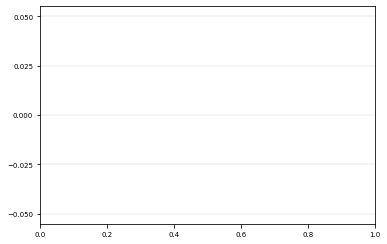

In [2]:
mpl.__version__
mpl.rcParams.update({'font.size': 7})
mpl.rcParams['axes.grid'] = True
mpl.rcParams.update({'axes.grid.axis':'y','grid.color':'#949494','grid.linewidth':0.2})
plt.locator_params(axis='y', nbins=5)   # y-axis

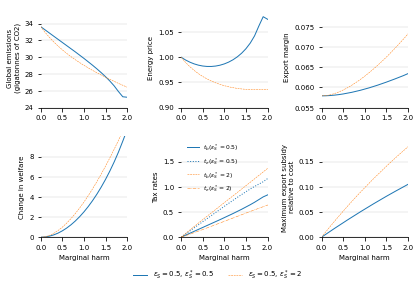

In [3]:
################################################################################
###### Fig 1:# Outcomes of optimal tax in OECD (two elasticities) ##############
################################################################################
df = pd.read_csv(data_root + 'output/direct_consumption_opt.csv');
dff = pd.read_csv(data_root + 'output/direct_consumption_higheps_opt.csv');
df['eff_te']=df['te']-df['tb']
dff['eff_te']=dff['te']-dff['tb']

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
ax1.set_position([.1, .6, .2, .35])
ax2.set_position([.425, .6, .2, .35])
ax3.set_position([.75, .6, .2, .35])
ax4.set_position([.1, .15, .2, .35])
ax5.set_position([.425, .15, .2, .35])
ax6.set_position([.75, .15, .2, .35])


for ax in fig.get_axes():
    ax.set_xlim(0,2)
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    

df1=df[(df['tax_sce']=='Unilateral') & (df['regionbase']=='OECD37 as Home')]
l1,=ax1.plot(df1['varphi'],df1['Qeworld_prime'], color='C0',linewidth=1)
ax2.plot(df1['varphi'],df1['pe'], color='C0',linewidth=1)
ax3.plot(df1['varphi'],df1['jxbar_prime'], color='C0',linewidth=1)
ax4.plot(df1['varphi'],df1['welfare'], color='C0',linewidth=1)
ax5.plot(df1['varphi'],df1['tb'], color='C0',linewidth=1)
ax5.plot(df1['varphi'],df1['eff_te'], linestyle='dotted', color='C0',linewidth=1)
ax6.plot(df1['varphi'],df1['subsidy_ratio'], color='C0',linewidth=1)

df1=dff[(dff['tax_sce']=='Unilateral') & (dff['regionbase']=='OECD37 as Home')]
l2,=ax1.plot(df1['varphi'],df1['Qeworld_prime'], color='C1',linewidth=0.5,linestyle='dashed')
ax2.plot(df1['varphi'],df1['pe'], color='C1',linewidth=0.5,linestyle='dashed')
ax3.plot(df1['varphi'],df1['jxbar_prime'], color='C1',linewidth=0.5,linestyle='dashed')
ax4.plot(df1['varphi'],df1['welfare'], color='C1',linewidth=0.5,linestyle='dashed')
ax5.plot(df1['varphi'],df1['tb'], color='C1',linewidth=0.5,linestyle='dashed')
ax5.plot(df1['varphi'],df1['eff_te'], color='C1',linewidth=0.5,linestyle='dashdot')
ax6.plot(df1['varphi'],df1['subsidy_ratio'], color='C1',linewidth=0.5,linestyle='dashed')

ax4.set_xlabel('Marginal harm')
ax5.set_xlabel('Marginal harm')
ax6.set_xlabel('Marginal harm')
ax1.set_ylabel('Global emissions \n(gigatonnes of CO2)')
ax2.set_ylabel('Energy price')
ax3.set_ylabel('Export margin')
ax4.set_ylabel('Change in welfare')
ax5.set_ylabel('Tax rates')
ax6.set_ylabel('Maximum export subsidy \nrelative to cost')

ax1.set_ylim(24, 36)
ax2.set_ylim(0.9, 1.1)
ax3.set_ylim(0.055, 0.080)
ax4.set_ylim(0, 10)
ax5.set_ylim(0, 2)
ax6.set_ylim(0, 0.2)

ax1.set_yticks([24,26,28,30,32,34])
ax2.set_yticks([0.9,0.95,1.0,1.05])
ax3.set_yticks([0.055, 0.060, 0.065, 0.070, 0.075])
ax4.set_yticks([0,2,4,6,8])
ax5.set_yticks([0,0.5,1,1.5])
ax6.set_yticks([0,0.05,0.1,0.15])

ax5.legend( (r"$t_b (\epsilon_S^*=0.5)$", "$t_e (\epsilon_S^*=0.5)$", "$t_b (\epsilon_S^*=2)$", "$t_e (\epsilon_S^*=2)$"),fontsize=6, loc='upper left', 
            shadow=False, frameon=False)

ax4.legend(handles = [l1,l2] , labels=[r"$\epsilon_S=0.5$, $\epsilon_S^*=0.5$","$\epsilon_S=0.5$, $\epsilon_S^*=2$"],
            loc='upper left', bbox_to_anchor=(1, -0.25),fancybox=True, shadow=False, ncol=4, frameon=False)

plt.savefig(plot_root + 'Optimal_policy_various_elasticities.eps', format='eps')
plt.savefig(plot_root+ 'Optimal_policy_various_elasticities.pdf', format='PDF')

In [4]:
df.regionbase.unique

<bound method Series.unique of 0              US as Home
1              US as Home
2              US as Home
3              US as Home
4              US as Home
              ...        
1195    US and EU as Home
1196    US and EU as Home
1197    US and EU as Home
1198    US and EU as Home
1199    US and EU as Home
Name: regionbase, Length: 1200, dtype: object>

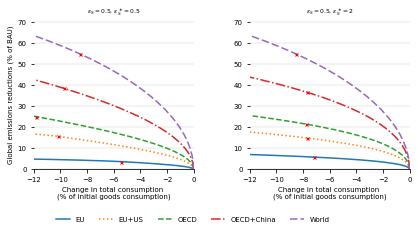

In [5]:
##############################################################################
# Fig 2: two PPFs with two elasticities (EU, EU/US, OECD, OECD/China, World) #
##############################################################################

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.set_position([.08, .32, .37, .52])
ax2.set_position([.58, .32, .37, .52])
Qeworld = 33.6353

x=0
for ax in fig.get_axes():
    ax.set_xlim(-12,0)
    ax.set_ylim(0,71)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.set_xlabel('Change in total consumption \n(% of initial goods consumption)')
    
    x=x+1
    if x==1:
        df = pd.read_csv(data_root + 'output/direct_consumption_opt.csv'); #elasticity (0.5,0.5)
        df1 = pd.read_csv(data_root + 'output/direct_consumption_global.csv')
        df = df.append(df1, ignore_index = True)
    elif x==2:
        df = pd.read_csv(data_root + 'output/direct_consumption_higheps_opt.csv'); #elasticity (0.5,2)
        df1 = pd.read_csv(data_root + 'output/direct_consumption_global.csv')
        df = df.append(df1, ignore_index = True)

    ##EU
    df1=df[(df['tax_sce']=='Unilateral') & (df['regionbase']=='EU28 as Home')] 
    df1['Qeworld_chg']=-(df1['Qeworld_prime']-Qeworld)/Qeworld*100;
    l1, = ax.plot(df1['welfare_noexternality'],df1['Qeworld_chg'],linestyle='solid')
    dot=df1[df1['varphi']==2] #puretp
    ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point') 
        
    
    ##EU/US
    df2=df[(df['tax_sce']=='Unilateral') & (df['regionbase']=='US and EU as Home')] 
    df2['Qeworld_chg']=-(df2['Qeworld_prime']-Qeworld)/Qeworld*100;
    l2, = ax.plot(df2['welfare_noexternality'],df2['Qeworld_chg'],linestyle='dotted')
    dot=df2[df2['varphi']==2] #puretp
    ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point') 
       
    
    ##OECD
    df3=df[(df['tax_sce']=='Unilateral')  & (df['regionbase']=='OECD37 as Home')]
    df3['Qeworld_chg']=-(df3['Qeworld_prime']-Qeworld)/Qeworld*100;
    l3, = ax.plot(df3['welfare_noexternality'],df3['Qeworld_chg'],linestyle='dashed')
    dot=df3[df3['varphi']==2] #puretp
    ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point') 
       
    
    ##OECD/China
    df4=df[(df['tax_sce']=='Unilateral') & (df['regionbase']=='OECD and China as Home')]
    df4['Qeworld_chg']=-(df4['Qeworld_prime']-Qeworld)/Qeworld*100;
    l4, = ax.plot(df4['welfare_noexternality'],df4['Qeworld_chg'],linestyle='dashdot')
    dot=df4[df4['varphi']==2] #puretp
    ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point') 
       
    
    ##World
    df5=df[(df['tax_sce']=='global')] 
    df5['Qeworld_chg']=-(df5['Qeworld_prime']-Qeworld)/Qeworld*100;
    l5, = ax.plot(df5['welfare_noexternality'],df5['Qeworld_chg'],linestyle='dashed',dashes = (5,2))
    dot=df5[df5['varphi']==2] #puretp
    ax.plot(dot['welfare_noexternality'],dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point') 
       

ax1.set_ylabel('Global emissions reductions (% of BAU)')
ax1.set_title(r"$\epsilon_S=0.5$, $\epsilon_S^\ast=0.5$", fontsize=6)
ax2.set_title(r"$\epsilon_S=0.5$, $\epsilon_S^\ast=2$", fontsize=6)

ax1.legend(handles = [l1,l2,l3,l4,l5] , labels=['EU', 'EU+US','OECD','OECD+China','World'],
            loc='upper left', bbox_to_anchor=(0.1, -0.27),fancybox=True, shadow=False, ncol=5,
            frameon=False)
# 

plt.savefig(plot_root + 'Homes.pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0.0)
plt.savefig(plot_root +'Homes.eps', format='eps', bbox_inches = 'tight', pad_inches = 0.0)

In [6]:
        #df = pd.read_csv(data_root + 'output/direct_consumption_opt.csv'); #elasticity (0.5,0.5)
        #df1 = pd.read_csv(data_root + 'output/direct_consumption_global.csv')
        #df = df.append(df1, ignore_index = True)
df ['Qeworld_chg'] = -(df['Qeworld_prime'] - Qeworld)/ Qeworld * 100
df[df['varphi'] == 2][['regionbase','welfare_noexternality', 'Qeworld_chg']]

,regionbase,welfare_noexternality,Qeworld_chg
20,US as Home,-8.092021,9.158277
220,EU28 as Home,-7.200987,5.778884
420,OECD37 as Home,-7.790749,21.430455
620,China as Home,-7.741484,15.877162
820,OECD and China as Home,-7.671074,36.449896
1020,US and EU as Home,-7.667047,14.808080
1220,OECD37 as Home,-8.518841,54.660238


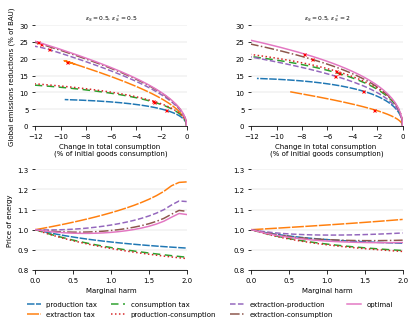

In [7]:
##############################################################################
######### Fig3: two PPFs with twasticities (7 taxes) #########################
##############################################################################

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2)
ax1.set_position([.1, .65, .35, .35])
ax2.set_position([.6, .65, .35, .35])
ax3.set_position([.1, .15, .35, .35])
ax4.set_position([.6, .15, .35, .35])

df1 = pd.read_csv(data_root + 'output/direct_consumption_opt.csv')
df1_constrained = pd.read_csv(data_root + 'output/direct_consumption_constrained.csv')
df1 = df1.append(df1_constrained, ignore_index = True)
df2 = pd.read_csv(data_root + 'output/direct_consumption_higheps_opt.csv')
df2_constrained = pd.read_csv(data_root + 'output/direct_consumption_higheps_constrained.csv')
df2 = df2.append(df2_constrained, ignore_index = True)

i = 0
for ax, df in zip([ax1,ax2],[df1,df2]):
    ax.set_xlim(-12,0)
    ax.set_ylim(0,30)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    x = 'welfare_noexternality'
    y = 'Qeworld_chg'
    df = df[df['regionbase'] == 'OECD37 as Home']
    ##puretp
    df_plot=df[(df['tax_sce']=='puretp')] 
    df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0])/df_plot['Qeworld_prime'].iat[0] * 100
    l1, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (5,1), label = 'production tax', color = 'C0')
    dot=df_plot[df_plot['varphi']==2] #puretp
    ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

    ##purete
    df_plot=df[(df['tax_sce']=='purete')] 
    df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0])/ df_plot['Qeworld_prime'].iat[0] * 100
    l2, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (8,1), label = 'extraction tax', color = 'C1')
    dot=df_plot[df_plot['varphi']==2] #puretp
    ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

    ##puretc
    df_plot=df[(df['tax_sce']=='puretc')] 
    df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
    l3, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (5,3), label = 'consumption tax', color = 'C2')
    dot=df_plot[df_plot['varphi']==2] #puretp
    ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

    ##production/consumption
    df_plot=df[(df['tax_sce']=='PC_hybrid')] 
    df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
    l4, = ax.plot(df_plot[x],df_plot[y],linestyle='dotted', label = 'production-consumption', color = 'C3')
    dot=df_plot[df_plot['varphi']==2] #puretp
    ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

    ##extracion/production
    df_plot=df[(df['tax_sce']=='EP_hybrid')] 
    df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
    l5, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed', label = 'extraction-production', color = 'C4')
    dot=df_plot[df_plot['varphi']==2] #puretp
    ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

    # #extraction/consumption
    df_plot=df[(df['tax_sce']=='EC_hybrid')]
    df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
    l6, = ax.plot(df_plot[x],df_plot[y],linestyle='dashdot', label = 'extraction-consumption', color = 'C5')
    dot=df_plot[df_plot['varphi']==2] #puretp
    ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

    ##unilateral optimal
    df_plot=df[(df['tax_sce']=='Unilateral')] 
    df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
    l7, = ax.plot(df_plot[x],df_plot[y], label = 'optimal', color = 'C6')
    dot=df_plot[df_plot['varphi']==2] #puretp
    ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 
    
    i+=1 
    
for ax, df in zip([ax3,ax4],[df1,df2]):
    ax.set_xlim(0,2)
    ax.set_ylim(0.8,1.3)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    x = 'varphi'
    y = 'pe'
    df = df[df['varphi']<=2]
    df = df[df['regionbase'] == 'OECD37 as Home']
    ##puretp
    df_plot=df[(df['tax_sce']=='puretp')] 
    df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0])/df_plot['Qeworld_prime'].iat[0] * 100
    l1, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (5,1), label = 'production tax', color = 'C0')

    ##purete
    df_plot=df[(df['tax_sce']=='purete')] 
    df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0])/ df_plot['Qeworld_prime'].iat[0] * 100
    l2, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (8,1), label = 'extraction tax', color = 'C1')

    ##puretc
    df_plot=df[(df['tax_sce']=='puretc')] 
    df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
    l3, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (5,3), label = 'consumption tax', color = 'C2')

    ##production/consumption
    df_plot=df[(df['tax_sce']=='PC_hybrid')] 
    df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
    l4, = ax.plot(df_plot[x],df_plot[y],linestyle='dotted', label = 'production-consumption', color = 'C3')

    ##extraction/production
    df_plot=df[(df['tax_sce']=='EP_hybrid')] 
    df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
    l5, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed', label = 'extraction-production', color = 'C4')

    # #extraction/consumption
    df_plot=df[(df['tax_sce']=='EC_hybrid')]
    df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
    l6, = ax.plot(df_plot[x],df_plot[y],linestyle='dashdot', label = 'extraction-consumption', color = 'C5')

    ##unilateral optimal
    df_plot=df[(df['tax_sce']=='Unilateral')] 
    df_plot['Qeworld_chg']=-(df_plot['Qeworld_prime']-df_plot['Qeworld_prime'].iat[0]) / df_plot['Qeworld_prime'].iat[0] * 100
    l7, = ax.plot(df_plot[x],df_plot[y], label = 'optimal', color = 'C6')
    
    i+=1 

################## Labels ##########################################
xlab = 'Change in total consumption \n(% of initial goods consumption)'
ylab = 'Global emissions reductions (% of BAU)'
ax1.set_ylabel(ylab)
ax1.set_xlabel(xlab)
ax2.set_xlabel(xlab)
ax1.set_title(r"$\epsilon_S=0.5$, $\epsilon_S^*=0.5$", fontsize=6)
ax2.set_title(r"$\epsilon_S=0.5$, $\epsilon_S^*=2$", fontsize=6)

xlab1 = 'Marginal harm'
ylab1 = 'Price of energy'
ax3.set_xlabel(xlab1)
ax4.set_xlabel(xlab1)
ax3.set_ylabel(ylab1)

labs = ['production tax', 'extraction tax','consumption tax','production-consumption','extraction-production','extraction-consumption','optimal']
ax3.legend(handles = [l1,l2,l3,l4,l5,l6,l7] , labels= labs, 
           loc='upper left', bbox_to_anchor=(-0.1, -0.25),fancybox=True, shadow=False, ncol=4, frameon=False)

plt.savefig(plot_root + 'temp.pdf', format='pdf', bbox_inches = 'tight')
plt.savefig(plot_root +'PPF_and_energy_price_various_taxes_new.eps', format='eps', bbox_inches = 'tight', pad_inches = 0.0)
plt.savefig(plot_root +'PPF_and_energy_price_various_taxes_new.pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0.0)

In [8]:
df2['Qeworld_chg'] = -(df2['Qeworld_prime'] - Qeworld) / Qeworld * 100
df2[df2['varphi'] == 2][['tax_sce','Qeworld_chg']]

,tax_sce,Qeworld_chg
20,Unilateral,9.158277
220,Unilateral,5.778884
420,Unilateral,21.430455
620,Unilateral,15.877162
820,Unilateral,36.449896
1020,Unilateral,14.808080
1220,purete,4.845030
1420,puretc,15.663088
1620,puretp,10.380633
1820,EC_hybrid,19.861127


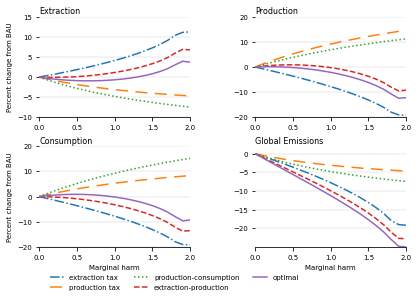

In [9]:
##############################################################################
############### Fig 5: location effects ######################################
##############################################################################
df = pd.read_csv(data_root + 'output/direct_consumption_constrained.csv')
df1 = pd.read_csv(data_root + 'output/direct_consumption_opt.csv')
df = df.append(df1, ignore_index = True)
df = df[df['regionbase'] == 'OECD37 as Home']
#df = pd.read_csv(data_root + 'output_sig0/ces0.csv')
Qestar=df['Qestar_prime'][0]    #BAU values
Qeworld=df['Qeworld_prime'][0]
Cestar=df['Ceystar_prime'][0]+df['Cex_prime'][0] + df['Cedstar_prime'][0]
Gestar=df['Cem_prime'][0]+df['Ceystar_prime'][0] + df['Cedstar_prime'][0]
df['chg_extraction']=df['chg_extraction']/Qestar*100  #change from absolute change to percent change
df['chg_production']=df['chg_production']/Gestar*100
df['chg_consumption']=df['chg_consumption']/Cestar*100
df['chg_Qeworld']=df['chg_Qeworld']/Qeworld*100

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
for ax in fig.get_axes():
    ax.set_xlim(0,2)
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.locator_params(axis='y', nbins=5)   # y-axis
    ax.locator_params(axis='x', nbins=5)   # y-axis

ax3.set_xlabel('Marginal harm')
ax4.set_xlabel('Marginal harm')
ax1.set_ylabel('Percent change from BAU')
ax3.set_ylabel('Percent change from BAU')
ax1.set_position([.1, .6, .35, .35])
ax2.set_position([.6, .6, .35, .35])
ax3.set_position([.1, .15, .35, .35])
ax4.set_position([.6, .15, .35, .35])
 

#
df1=df[(df['tax_sce']=='purete')]
l1, = ax1.plot(df1['varphi'],df1['chg_extraction'],linestyle='dashdot')
ax2.plot(df1['varphi'],df1['chg_production'],linestyle='dashdot')
ax3.plot(df1['varphi'],df1['chg_consumption'],linestyle='dashdot')
ax4.plot(df1['varphi'],df1['chg_Qeworld'],linestyle='dashdot')

#
df2=df[(df['tax_sce']=='puretp')]
l2, = ax1.plot(df2['varphi'],df2['chg_extraction'],linestyle='dashed',dashes = (8,5))
ax2.plot(df2['varphi'],df2['chg_production'],linestyle='dashed',dashes = (8,5))
ax3.plot(df2['varphi'],df2['chg_consumption'],linestyle='dashed',dashes = (8,5))
ax4.plot(df2['varphi'],df2['chg_Qeworld'],linestyle='dashed',dashes = (8,5))


#
df3=df[(df['tax_sce']=='PC_hybrid')]
l3, = ax1.plot(df3['varphi'],df3['chg_extraction'],linestyle='dotted')
ax2.plot(df3['varphi'],df3['chg_production'],linestyle='dotted')
ax3.plot(df3['varphi'],df3['chg_consumption'],linestyle='dotted')
ax4.plot(df3['varphi'],df3['chg_Qeworld'],linestyle='dotted')

#
df4=df[(df['tax_sce']=='EP_hybrid')]
l4, = ax1.plot(df4['varphi'],df4['chg_extraction'],linestyle='dashed')
ax2.plot(df4['varphi'],df4['chg_production'],linestyle='dashed')
ax3.plot(df4['varphi'],df4['chg_consumption'],linestyle='dashed')
ax4.plot(df4['varphi'],df4['chg_Qeworld'],linestyle='dashed')

#
df5=df[(df['tax_sce']=='Unilateral')]
l5, = ax1.plot(df5['varphi'],df5['chg_extraction'],linestyle='solid')
ax2.plot(df5['varphi'],df5['chg_production'],linestyle='solid')
ax3.plot(df5['varphi'],df5['chg_consumption'],linestyle='solid')
ax4.plot(df5['varphi'],df5['chg_Qeworld'],linestyle='solid')

ax1.set_title('Extraction',loc='left',fontsize = 8, pad=3)
ax1.set_ylim(-10,15)
ax1.set_yticks([-10,-5, 0, 5,10, 15])
ax2.set_title('Production',loc='left',fontsize = 8, pad=3)
ax2.set_ylim(-20,20)
ax2.set_yticks([-20,-10 , 0, 10, 20])
ax3.set_title('Consumption',loc='left',fontsize = 8, pad=3)
ax3.set_ylim(-20,20)
ax2.set_yticks([-20,-10 , 0, 10, 20])
ax4.set_title('Global Emissions',loc='left',fontsize = 8, pad=3)
ax4.set_ylim(-25, 2)
ax4.set_yticks([-20., -15, -10, -5, 0])

ax4.legend(handles = [l1,l2,l3,l4,l5] , 
            labels=['extraction tax', 'production tax','production-consumption', 
                    'extraction-production','optimal'],
            loc='upper left', bbox_to_anchor=(-1.4, -0.21),
            fancybox=True, shadow=False, ncol=3, frameon=False)

plt.savefig(plot_root + 'leakage.pdf', format='pdf')
plt.savefig(plot_root + 'leakage.eps', format='eps')

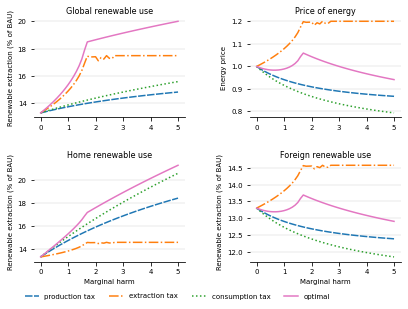

In [5]:
##############################################################################
############### Fig 6: Renewable effects #####################################
##############################################################################
df1= pd.read_csv(data_root + 'output/direct_consumption_renewable.csv')
df2 = pd.read_csv(data_root + 'output/direct_consumption_opt.csv')
df1 = df1[df1['regionbase'] == 'OECD37 as Home']
df1['Qe1world_prime'] = df1['Qe1_prime'] + df1['Qe1star_prime']
df1 = df1[df1['varphi'] <= 5]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.set_position([.1, .65, .35, .35])
ax2.set_position([.6, .65, .35, .35])
ax3.set_position([.1, .15, .35, .35])
ax4.set_position([.6, .15, .35, .35])

for ax in fig.get_axes():
    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)

##################World Renewable Use###########################
df1['Qe2world'] = df1['Qe2_prime'] + df1['Qe2star_prime']
df1['prop_qe2'] = df1['Qe2world'] / df1['Qeworld_prime'] * 100
x = 'varphi'
y = 'prop_qe2'

df_plot = df1[df1['tax_sce'] == 'puretp']
ax1.plot(df_plot[x], df_plot[y], linestyle='dashed',dashes = (5,1), label = 'production tax', color = 'C0')

df_plot = df1[df1['tax_sce'] == 'purete']
ax1.plot(df_plot[x], df_plot[y], linestyle='dashdot', label = 'extraction tax',color = 'C1') 

df_plot = df1[df1['tax_sce'] == 'puretc']
ax1.plot(df_plot[x], df_plot[y], linestyle='dotted', label = 'consumption tax',color = 'C2')

df_plot = df1[df1['tax_sce'] == 'Unilateral']
ax1.plot(df_plot[x], df_plot[y], label = 'optimal', color = 'C6')

################## Home Renewable Use ###########################
x = 'varphi'
y = 'pe'

df_plot = df1[df1['tax_sce'] == 'puretp']
ax2.plot(df_plot[x], df_plot[y], linestyle='dashed',dashes = (5,1), label = 'production tax', color = 'C0')

df_plot = df1[df1['tax_sce'] == 'purete']
ax2.plot(df_plot[x], df_plot[y], linestyle='dashdot', label = 'extraction tax',color = 'C1') 

df_plot = df1[df1['tax_sce'] == 'puretc']
ax2.plot(df_plot[x], df_plot[y], linestyle='dotted', label = 'consumption tax',color = 'C2')

df_plot = df1[df1['tax_sce'] == 'Unilateral']
ax2.plot(df_plot[x], df_plot[y], label = 'optimal', color = 'C6')

################## Home Renewable Use ###########################
df1['prop_energy'] = df1['Qe2_prime'] / df1['Qe_prime'].iat[0] * 100
x = 'varphi'
y = 'prop_energy'

df_plot = df1[df1['tax_sce'] == 'puretp']
ax3.plot(df_plot[x], df_plot[y], linestyle='dashed',dashes = (5,1), label = 'production tax', color = 'C0')

df_plot = df1[df1['tax_sce'] == 'purete']
ax3.plot(df_plot[x], df_plot[y], linestyle='dashdot', label = 'extraction tax',color = 'C1') 

df_plot = df1[df1['tax_sce'] == 'puretc']
ax3.plot(df_plot[x], df_plot[y], linestyle='dotted', label = 'consumption tax',color = 'C2')

df_plot = df1[df1['tax_sce'] == 'Unilateral']
ax3.plot(df_plot[x], df_plot[y], label = 'optimal', color = 'C6')

################## Foreign Renewable Use ###########################
df1['prop_energy_star'] = df1['Qe2star_prime'] / df1['Qestar_prime'].iat[0] * 100
x = 'varphi'
y = 'prop_energy_star'

df_plot = df1[df1['tax_sce'] == 'puretp']
ax4.plot(df_plot[x], df_plot[y], linestyle='dashed',dashes = (5,1), label = 'production tax', color = 'C0')

df_plot = df1[df1['tax_sce'] == 'purete']
ax4.plot(df_plot[x], df_plot[y], linestyle='dashdot', label = 'extraction tax',color = 'C1')

df_plot = df1[df1['tax_sce'] == 'puretc']
ax4.plot(df_plot[x], df_plot[y], linestyle='dotted', label = 'consumption tax',color = 'C2')

df_plot = df1[df1['tax_sce'] == 'Unilateral']
ax4.plot(df_plot[x], df_plot[y], label = 'optimal', color = 'C6')

##################### Graph settings ##########################

ylab1 = 'Renewable extraction (% of BAU)'
ax1.set_ylabel(ylab1)
ax1.set_title('Global renewable use',fontsize = 8, pad=3)

ylab2 = 'Energy price'
xlab2 = 'Marginal harm'
#ax2.set_xlabel(xlab2)
ax2.set_ylabel(ylab2)
ax2.set_title('Price of energy', fontsize = 8, pad = 3)

ylab3 = 'Renewable extraction (% of BAU)'
xlab3 = 'Marginal harm'
ax3.set_xlabel(xlab3)
ax3.set_ylabel(ylab3)
ax3.set_title('Home renewable use', fontsize = 8, pad = 3)

ylab4 = 'Renewable extraction (% of BAU)'
xlab4 = 'Marginal harm'
ax4.set_xlabel(xlab4)
ax4.set_ylabel(ylab4)
ax4.set_title('Foreign renewable use', fontsize = 8, pad = 3)

labs = ['production tax', 'extraction tax','consumption tax','production-consumption','extraction-production','extraction-consumption','optimal']
ax3.legend(loc='upper left', bbox_to_anchor=(-0.1, -0.25),fancybox=True, shadow=False, ncol=4, frameon=False)

#plt.suptitle("Effects of Renewables")
#plt.savefig(plot_root + 'renewable_commonscale.pdf', format='pdf', bbox_inches = 'tight')
#plt.savefig(plot_root + 'renewable_commonscale.eps', format='eps', bbox_inches = 'tight', pad_inches = 0.0)

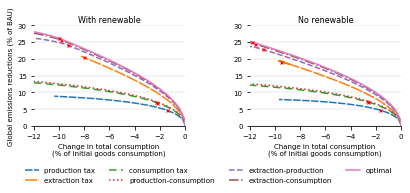

In [4]:
##############################################################################
############### Fig 7: Renewable comparisons #################################
##############################################################################
df1= pd.read_csv(data_root + 'output/direct_consumption_renewable.csv')
df2 = pd.read_csv(data_root + 'output/direct_consumption_opt.csv')
df2_constrained = pd.read_csv(data_root + 'output/direct_consumption_constrained.csv')
df2 = df2.append(df2_constrained, ignore_index = True)
df1['Qe1world_prime'] = df1['Qe1_prime'] + df1['Qe1star_prime']

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_position([.1, .65, .35, .35])
ax2.set_position([.6, .65, .35, .35])

i = 0
for ax,df in zip(fig.get_axes(), [df1,df2]):
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.set_xlim(-12,0)
    ax.set_ylim(0,30)
    
    df = df[df['regionbase'] == 'OECD37 as Home']

    x = 'welfare_noexternality'
    y = 'Qeworld_chg'
    if i == 0:
        df['Qeworld_chg'] = -(df['Qe1world_prime']-df['Qe1world_prime'].iat[0])/df['Qe1world_prime'].iat[0] * 100
    else:
        df['Qeworld_chg'] = -(df['Qeworld_prime']-df['Qeworld_prime'].iat[0])/df['Qeworld_prime'].iat[0] * 100
    ##puretp
    df_plot=df[(df['tax_sce']=='puretp')] 
    #df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0])/df_plot['Qe1world_prime'].iat[0] * 100
    l1, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (5,1), label = 'production tax', color = 'C0')
    dot=df_plot[df_plot['varphi']==2] #puretp
    ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

    ##purete
    df_plot=df[(df['tax_sce']=='purete')] 
    #df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0])/ df_plot['Qe1world_prime'].iat[0] * 100
    l2, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (8,1), label = 'extraction tax', color = 'C1')
    dot=df_plot[df_plot['varphi']==2] #puretp
    ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

    ##puretc
    df_plot=df[(df['tax_sce']=='puretc')] 
    #df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0]) / df_plot['Qe1world_prime'].iat[0] * 100
    l3, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (5,3), label = 'consumption tax', color = 'C2')
    dot=df_plot[df_plot['varphi']==2] #puretp
    ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

    ##production/consumption
    df_plot=df[(df['tax_sce']=='PC_hybrid')] 
    #df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0]) / df_plot['Qe1world_prime'].iat[0] * 100
    l4, = ax.plot(df_plot[x],df_plot[y],linestyle='dotted', label = 'production-consumption', color = 'C3')
    dot=df_plot[df_plot['varphi']==2] #puretp
    ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

    ##extracion/production
    df_plot=df[(df['tax_sce']=='EP_hybrid')] 
    #df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0]) / df_plot['Qe1world_prime'].iat[0] * 100
    l5, = ax.plot(df_plot[x],df_plot[y],linestyle='dashed', label = 'extraction-production', color = 'C4')
    dot=df_plot[df_plot['varphi']==2] #puretp
    ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

    # #extraction/consumption
    df_plot=df[(df['tax_sce']=='EC_hybrid')]
    #df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0]) / df_plot['Qe1world_prime'].iat[0] * 100
    l6, = ax.plot(df_plot[x],df_plot[y],linestyle='dashdot', label = 'extraction-consumption', color = 'C5')
    dot=df_plot[df_plot['varphi']==2] #puretp
    ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

    ##unilateral optimal
    df_plot=df[(df['tax_sce']=='Unilateral')] 
    #df_plot['Qeworld_chg']=-(df_plot['Qe1world_prime']-df_plot['Qe1world_prime'].iat[0]) / df_plot['Qe1world_prime'].iat[0] * 100
    l7, = ax.plot(df_plot[x],df_plot[y], label = 'optimal', color = 'C6')
    dot=df_plot[df_plot['varphi']==2] #puretp
    ax.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 
    i+= 1


ylab1 = 'Global emissions reductions (% of BAU)'
xlab1 = 'Change in total consumption \n(% of initial goods consumption)'
ax1.set_ylabel(ylab1)
ax1.set_xlabel(xlab1)
ax1.set_title('With renewable',fontsize = 8, pad=3)

xlab2 = 'Change in total consumption \n(% of initial goods consumption)'
ax2.set_xlabel(xlab2)
ax2.set_title('No renewable', fontsize = 8, pad = 3)

ax1.legend(loc='upper left', bbox_to_anchor=(-0.1, -0.35),fancybox=True, shadow=False, ncol=4, frameon=False)
plt.savefig(plot_root + 'renewable_comparison.pdf', format='pdf', bbox_inches = 'tight')
plt.savefig(plot_root + 'renewable_comparison.eps', format='eps', bbox_inches = 'tight', pad_inches = 0.0)